In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.tsa.stattools as sts 
import statsmodels.graphics.tsaplots as sgt
import re
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
dfTrain=pd.read_csv("train.csv")
dfTest=pd.read_csv("test.csv")
#Keep the original copies
dfTr=dfTrain.copy()
dfTe=dfTest.copy()

In [3]:
print(dfTrain.head(10))
print(dfTest.tail(10))

            row_id  cfips          county    state first_day_of_month  \
0  1001_2019-08-01   1001  Autauga County  Alabama         2019-08-01   
1  1001_2019-09-01   1001  Autauga County  Alabama         2019-09-01   
2  1001_2019-10-01   1001  Autauga County  Alabama         2019-10-01   
3  1001_2019-11-01   1001  Autauga County  Alabama         2019-11-01   
4  1001_2019-12-01   1001  Autauga County  Alabama         2019-12-01   
5  1001_2020-01-01   1001  Autauga County  Alabama         2020-01-01   
6  1001_2020-02-01   1001  Autauga County  Alabama         2020-02-01   
7  1001_2020-03-01   1001  Autauga County  Alabama         2020-03-01   
8  1001_2020-04-01   1001  Autauga County  Alabama         2020-04-01   
9  1001_2020-05-01   1001  Autauga County  Alabama         2020-05-01   

   microbusiness_density  active  
0               3.007682    1249  
1               2.884870    1198  
2               3.055843    1269  
3               2.993233    1243  
4               2.993

In [4]:
#Check for feature inconsistencies
#The function for finding raw date pattern
def findPattern(datePattern,strData):
    try:
        strInfo=re.findall(datePattern,strData)[0]
    except:
        strInfo=""
    return strInfo


#The function for seperating county id from date string
def seperateCountyId(x):
    datePattern=r"([^=\"]*)_[^=\"]*"
    strInfo=findPattern(datePattern,x)
    return strInfo

#The function for seperating date string from county id
def seperateCountyDate(x):
    datePattern=r"[^=\"]*_([^=\"]*)"
    strInfo=findPattern(datePattern,x)
    return strInfo

def checkColumnsEquality(df,col1,col2):
    return df[col1].equals(df[col2])


In [5]:
dfTrain["cfipsChecked"]=pd.to_numeric(dfTrain["row_id"].apply(seperateCountyId))
dfTrain["dateChecked"]=dfTrain["row_id"].apply(seperateCountyDate)

In [6]:
print("Date Columns are equal? : "+str(checkColumnsEquality(dfTrain,col1="dateChecked",col2="first_day_of_month")))
print("CFIPS Columns are equal? : "+str(checkColumnsEquality(dfTrain,col1="cfipsChecked",col2="cfips")))

Date Columns are equal? : True
CFIPS Columns are equal? : True


In [7]:
dfTest["cfipsChecked"]=pd.to_numeric(dfTest["row_id"].apply(seperateCountyId))
dfTest["dateChecked"]=dfTest["row_id"].apply(seperateCountyDate)

In [8]:
print("Date Columns are equal? : "+str(checkColumnsEquality(dfTest,col1="dateChecked",col2="first_day_of_month")))
print("CFIPS Columns are equal? : "+str(checkColumnsEquality(dfTest,col1="cfipsChecked",col2="cfips")))

Date Columns are equal? : True
CFIPS Columns are equal? : True


In [9]:
columnsToRemoveTrain=["dateChecked","cfipsChecked","row_id", "county", "state", "active"]
columnsToRemoveTest=["dateChecked","cfipsChecked","row_id"]

dfTrain=dfTrain.drop(columns=columnsToRemoveTrain)
dfTest=dfTest.drop(columns=columnsToRemoveTest)

print(dfTrain.head(10))
print(dfTest.tail(10))

   cfips first_day_of_month  microbusiness_density
0   1001         2019-08-01               3.007682
1   1001         2019-09-01               2.884870
2   1001         2019-10-01               3.055843
3   1001         2019-11-01               2.993233
4   1001         2019-12-01               2.993233
5   1001         2020-01-01               2.969090
6   1001         2020-02-01               2.909326
7   1001         2020-03-01               2.933231
8   1001         2020-04-01               3.000167
9   1001         2020-05-01               3.004948
       cfips first_day_of_month
25070  56027         2023-06-01
25071  56029         2023-06-01
25072  56031         2023-06-01
25073  56033         2023-06-01
25074  56035         2023-06-01
25075  56037         2023-06-01
25076  56039         2023-06-01
25077  56041         2023-06-01
25078  56043         2023-06-01
25079  56045         2023-06-01


In [10]:
dfTrain["first_day_of_month"]=pd.to_datetime(dfTrain["first_day_of_month"], yearfirst=True)
dfTest["first_day_of_month"]=pd.to_datetime(dfTest["first_day_of_month"], yearfirst=True)

In [11]:
dfTrain["year"]=dfTrain["first_day_of_month"].dt.year
dfTrain["month"]=dfTrain["first_day_of_month"].dt.month
dfTest["year"]=dfTest["first_day_of_month"].dt.year
dfTest["month"]=dfTest["first_day_of_month"].dt.month

In [12]:
dfTrain=dfTrain[["first_day_of_month", "year", "month", "cfips", "microbusiness_density"]]
dfTest=dfTest[["first_day_of_month", "year", "month", "cfips"]]
dfTrain.reset_index(drop=True,inplace=True)
dfTest.reset_index(drop=True,inplace=True)

print(dfTrain.head(10))
print(dfTest.tail(10))

  first_day_of_month  year  month  cfips  microbusiness_density
0         2019-08-01  2019      8   1001               3.007682
1         2019-09-01  2019      9   1001               2.884870
2         2019-10-01  2019     10   1001               3.055843
3         2019-11-01  2019     11   1001               2.993233
4         2019-12-01  2019     12   1001               2.993233
5         2020-01-01  2020      1   1001               2.969090
6         2020-02-01  2020      2   1001               2.909326
7         2020-03-01  2020      3   1001               2.933231
8         2020-04-01  2020      4   1001               3.000167
9         2020-05-01  2020      5   1001               3.004948
      first_day_of_month  year  month  cfips
25070         2023-06-01  2023      6  56027
25071         2023-06-01  2023      6  56029
25072         2023-06-01  2023      6  56031
25073         2023-06-01  2023      6  56033
25074         2023-06-01  2023      6  56035
25075         2023-06-01  

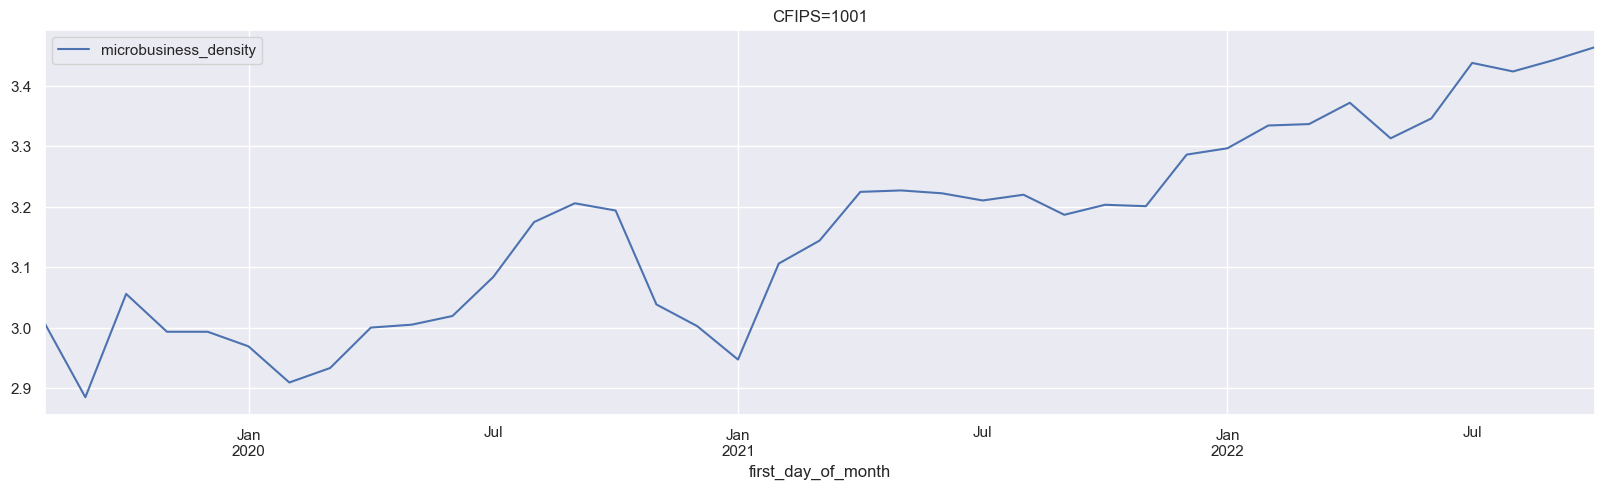

In [13]:
dfTrain[dfTrain.cfips==1001].plot(x="first_day_of_month",y="microbusiness_density",figsize=(20,5), title = "CFIPS=1001")
plt.show()

In [14]:
#See the features 
dfTrain.columns

Index(['first_day_of_month', 'year', 'month', 'cfips',
       'microbusiness_density'],
      dtype='object')

In [15]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   first_day_of_month     122265 non-null  datetime64[ns]
 1   year                   122265 non-null  int64         
 2   month                  122265 non-null  int64         
 3   cfips                  122265 non-null  int64         
 4   microbusiness_density  122265 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 4.7 MB


In [16]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25080 entries, 0 to 25079
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   first_day_of_month  25080 non-null  datetime64[ns]
 1   year                25080 non-null  int64         
 2   month               25080 non-null  int64         
 3   cfips               25080 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 783.9 KB


In [17]:
pd.options.display.max_columns = 4000
pd.options.display.max_rows = 4000

In [18]:
oneStateFreq=dfTrain["cfips"].value_counts().iloc[0]

In [19]:
checkFunc=lambda x: 0 if x==oneStateFreq else 1

In [20]:
#All states have same amount of information inside the train dataset
dfTrain["cfips"].value_counts().apply(checkFunc).sum()

0

In [21]:
oneStateFreq=dfTest["cfips"].value_counts().iloc[0]

In [22]:
#All states have same amount of information inside the test set
dfTest["cfips"].value_counts().apply(checkFunc).sum()

0

In [23]:
#Check whether "cfips" of the train set and test set are the same
#These checks are important to be done for all newcommer dataset as long as time period passes
#THerefore if we have missing states or data in the future, we can easily detect it by using checks.
checkCfips=pd.DataFrame(columns=["trainCfips","testCfips"])
checkCfips["trainCfips"]=dfTrain["cfips"].value_counts().index.sort_values()
checkCfips["testCfips"]=dfTest["cfips"].value_counts().index.sort_values()
def checkCfipsFunc(df):
    if df["trainCfips"].equals(df["testCfips"]):
        print("We checked the equality of cfips values w.r.t. train and test set")
        return True
    else:
        return False

checkCfipsFunc(checkCfips)

We checked the equality of cfips values w.r.t. train and test set


True

In [24]:
#Let's convert the dataset by transposing it w.r.t. "cfips"
def convertData(df,cfips):
    newDf=pd.DataFrame()
    newDf.index=df[df.cfips==1001]["first_day_of_month"].copy()
    df.index=df["first_day_of_month"].copy()
    func=lambda x: x
    for cfip in cfips:
        try:
            newDf[str(cfip)]=df[df.cfips==cfip]["microbusiness_density"].copy()#
        except Exception as e:
            print(e)#For 2020, it does not accept column because it confuse with index 2020 values.
            newDf[str(cfip)+"a"]=df[df.cfips==cfip]["microbusiness_density"].copy()
    return newDf
cfips=list(checkCfips["trainCfips"])
dfTrainTrans=convertData(dfTrain.copy(),cfips)
dfTrainTrans.head(10)

Must have equal len keys and value when setting with an iterable


1001      1003      1005      1007      1009  \
first_day_of_month                                                     
2019-08-01          3.007682  7.239156  1.073138  1.310777  1.544148   
2019-09-01          2.884870  7.290936  0.995794  1.305176  1.575892   
2019-10-01          3.055843  7.425439  1.160149  1.254761  1.546415   
2019-11-01          2.993233  7.426071  1.000628  1.254761  1.573625   
2019-12-01          2.993233  7.470274  1.000628  1.265965  1.555485   
2020-01-01          2.969090  7.413655  1.027229  1.253638  1.573217   
2020-02-01          2.909326  7.282522  1.022314  1.248041  1.536999   
2020-03-01          2.933231  7.309610  1.032144  1.264831  1.541526   
2020-04-01          3.000167  7.568799  1.086209  1.270428  1.577744   
2020-05-01          3.004948  7.603275  1.081294  1.287217  1.575481   

                        1011      1013      1015      1017      1019  \
first_day_of_month                                                     
2019-08-01          0.926372  0.674981  2.691544  1.486542  1.104277   
2019-09-01          0.998556  0.739265  2.703752  1.355156  1.089747   
2019-10-01          0.974495  0.713551  2.693764  1.355156  1.084903   
2019-11-01          1.022618  1.054256  2.739270  1.362664  1.084903   
2019-12-01          1.034649  1.054256  2.729281  1.343894  1.089747   
2020-01-01          1.060717  1.060871  2.719628  1.319910  1.079399   
2020-02-01          1.036333  1.060871  2.745211  1.331096  1.069675   
2020-03-01          1.060717  1.009121  2.756335  1.301268  1.074537   
2020-04-01          1.011948  0.996183  2.818625  1.327368  1.059950   
2020-05-01          0.890027  0.996183  2.834197  1.342282  1.084261   

                        1021      1023      1025      1027      1029  \
first_day_of_month                                                     
2019-08-01          1.425350  1.049418  1.156402  1.345972  1.184566   
2019-09-01          1.434371  1.049418  1.051750  1.421801  1.193276   
2019-10-01          1.401293  1.068498  1.046518  1.450237  1.201986   
2019-11-01          1.449406  1.078039  1.046518  1.516588  1.167146   
2019-12-01          1.455420  1.049418  1.046518  1.497630  1.167146   
2020-01-01          1.460205  1.093525  1.073797  1.477413  1.260870   
2020-02-01          1.469218  1.122302  1.021160  1.496354  1.234783   
2020-03-01          1.409128  1.151079  1.042215  1.553177  1.286957   
2020-04-01          1.451191  1.179856  1.089588  1.505824  1.278261   
2020-05-01          1.490250  1.199041  1.058006  1.524766  1.286957   

                        1031      1033      1035      1037      1039  \
first_day_of_month                                                     
2019-08-01          2.061406  2.312355  0.739241  0.563536  1.503708   
2019-09-01          2.081943  2.305334  0.729114  0.552486  1.537883   
2019-10-01          2.071674  2.277249  0.739241  0.530387  1.554971   
2019-11-01          2.120450  2.347462  0.769620  0.519337  1.558388   
2019-12-01          2.115315  2.314696  0.759494  0.508287  1.548136   
2020-01-01          2.090628  2.294402  0.790834  0.499722  1.539728   
2020-02-01          2.059959  2.282743  0.770557  0.499722  1.546586   
2020-03-01          2.098295  2.294402  0.770557  0.533037  1.539728   
2020-04-01          2.090628  2.317719  0.780696  0.521932  1.539728   
2020-05-01          2.100851  2.313055  0.750279  0.499722  1.526011   

                        1041      1043      1045      1047      1049  \
first_day_of_month                                                     
2019-08-01          0.922475  2.487923  1.381501  1.160479  2.156570   
2019-09-01          0.950429  2.478452  1.368268  1.196336  2.119292   
2019-10-01          0.913157  2.492659  1.360328  1.206115  2.145387   
2019-11-01          0.978382  2.491081  1.392087  1.186557  2.124883   
2019-12-01          0.922475  2.483188  1.381501  1.186557  2.167754   
2020-01-01          0.958229  2.448973  1.393414  1.196734  

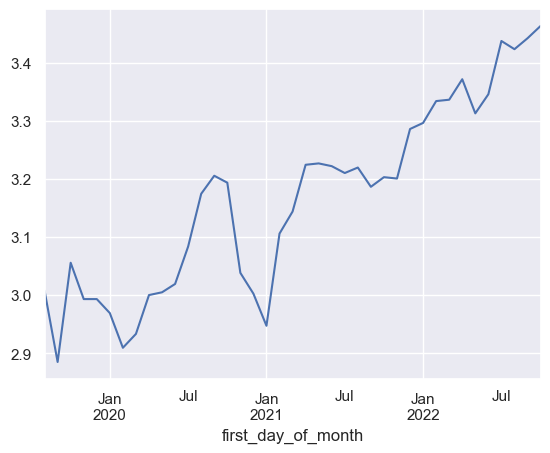

In [25]:
dfTrainTrans["1001"].plot()
plt.show()

In [26]:
#An example for stationary test that shows 1001 is non-stationary
sts.adfuller(dfTrainTrans["1001"])

(0.9881707095895989,
 0.9941395544199386,
 9,
 29,
 {'1%': -3.6790595944893187,
  '5%': -2.9678817237279103,
  '10%': -2.6231583472057074},
 -82.70248324760354)

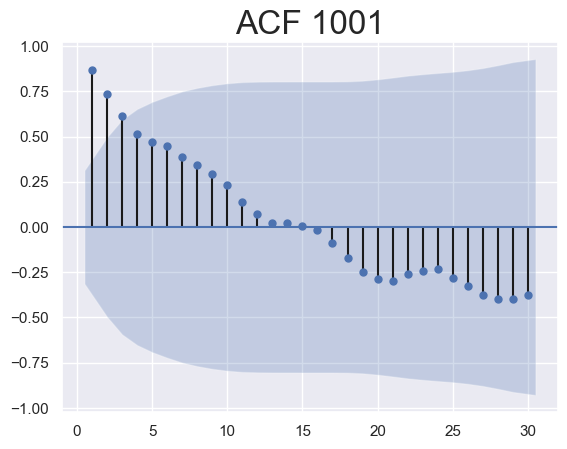

In [28]:
sgt.plot_acf(dfTrainTrans["1001"], lags=30, zero = False)
plt.title("ACF 1001", size=24)
plt.show()

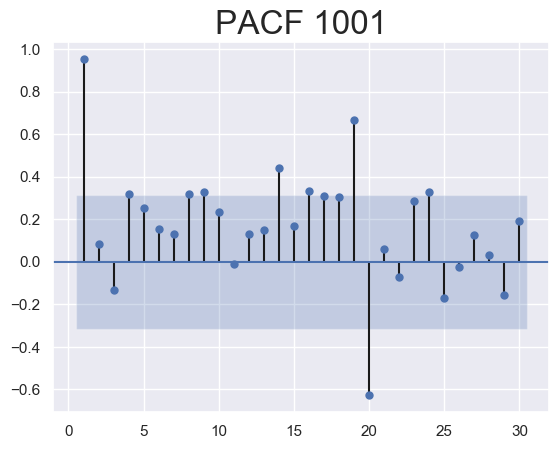

In [30]:
sgt.plot_pacf(dfTrainTrans["1001"], lags = 30, zero = False, method = ('ols'))
plt.title("PACF 1001", size=24)
plt.show()